<a href="https://colab.research.google.com/github/Patternic10/CSCI-4170-Project-in-AI-ML/blob/main/Homework4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task 1

The code for this task was adpated from the repository https://github.com/alvingao/min-char-rnn-pytorch.

In [ ]:
"""
Vanilla RNN implementation of min-char-rnn in PyTorch
"""

import torch
from torch import nn, optim
from torch.distributions import Categorical
from torch.nn import functional as F
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter

from config import FILENAME, CHECKPOINT_DIR, LOG_DIR
from dataset import TextDataset


class RNN(nn.Module):
    """
    Vanilla RNN implementation of min-char-rnn in PyTorch
    """

    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()

        self.input_size = input_size
        self.hidden_size = hidden_size

        self.i2h = nn.Linear(input_size, hidden_size)
        self.h2h = nn.Linear(hidden_size, hidden_size)
        self.h2o = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    # pylint: disable=W0622
    def forward(self, input, hidden):
        """
        Forward pass of the RNN
        """
        hidden = F.tanh(self.i2h(input) + self.h2h(hidden))
        output = self.h2o(hidden)
        output = self.softmax(output)
        return output, hidden.detach()

    def init_hidden(self, batch_size: int = 1):
        """
        Returns a new hidden state of the RNN for given batch size
        """
        return torch.zeros(batch_size, self.hidden_size)


def generate_text(rnn: RNN, dataset: TextDataset, seed: torch.Tensor, n: int) -> str:
    """
    Generate text output using the model.
    """
    with torch.no_grad():
        # When generating text sequence, batch size is always 1
        hidden = rnn.init_hidden(1)

        indices = []
        idx = seed

        for _ in range(n):
            # pylint: disable=W0622,E1102
            input = F.one_hot(idx, num_classes=dataset.vocab_size).float()

            output, hidden = rnn(input, hidden)

            # Construct categorical distribution and sample a (random) character
            dist = Categorical(logits=output)
            next_idx = dist.sample().item()

            indices.append(next_idx)
            idx = torch.tensor(next_idx)

        text = dataset.vector_to_string(indices)
        return text

def train(
    dataloader: DataLoader,
    model: RNN,
    loss_fn,
    optimizer: optim.Optimizer,
    writer: SummaryWriter,
    num_epochs: int = 5,
):
    """
    Train the network
    """
    for epoch in range(num_epochs):
        for batch_idx, (batch_inputs, batch_targets) in enumerate(dataloader):
            # Make the first dimension as the sequence length and second dimension as batch size
            batch_inputs = batch_inputs.transpose(0, 1).float()
            batch_targets = batch_targets.transpose(0, 1).long()

            seq_length = batch_inputs.size(0)
            batch_size = batch_inputs.size(1)

            hidden = model.init_hidden(batch_size)

            optimizer.zero_grad()
            loss = 0

            for idx in range(seq_length):
                output, hidden = model(batch_inputs[idx], hidden)
                loss += loss_fn(output, batch_targets[idx])

            loss.backward()

            # Fix the gradient exploding problem with RNNs
            nn.utils.clip_grad_norm_(model.parameters(), 5)

            optimizer.step()

            #if batch_idx % 100 == 0:
             #   print(f"Epoch {epoch}, Iteration {batch_idx}, Loss {loss.item()}")
            #    writer.add_scalar(
            #        "Training Loss", loss.item(), epoch * len(dataloader) + batch_idx
             #   )

            #if batch_idx % 500 == 0:
            #    text = generate_text(
             #       model,
            #        dataloader.dataset,
            #        batch_inputs[0][0].argmax(),
             #       1000,
             #   )
              #  print("---------------")
             #   print("Sampled text:")
              #  print(text)
             #   print("---------------")

        #print(f"Epoch: {epoch} finished. Saving model weights.")
        #save_model_weights(model, f"{CHECKPOINT_DIR}/rnn_epoch_{epoch}.pth")
     # Generate text only after the final epoch
    #print("Training complete. Generating text after the final epoch...")
def setup_device():
    """
    Setup default device preferring GPUs.
    """
    device = torch.device(
        "cuda"
        if torch.cuda.is_available()
        else "mps"
        if torch.backends.mps.is_available()
        else "cpu"
    )
    torch.set_default_device(device)

    return device
    dataset = TextDataset(FILENAME)
    seed = torch.tensor(dataset.char_to_idx["A"])  # Use any seed character
    generated_text = generate_text(model, dataset, seed, 1000)
    print("Generated Text:")
    print(generated_text)

device = setup_device()

dataset = TextDataset(FILENAME)
dataloader = DataLoader(
dataset, batch_size=64, shuffle=True, generator=torch.Generator(device=device)
    )

rnn = RNN(dataset.vocab_size, 128, dataset.vocab_size)

loss_fn = nn.NLLLoss()
optimizer = optim.Adam(rnn.parameters(), lr=1e-3)

writer = SummaryWriter(LOG_DIR)

In [ ]:
train(dataloader, rnn, loss_fn, optimizer, writer, num_epochs=5)

Epoch: 0 finished. Saving model weights.
Epoch: 1 finished. Saving model weights.
Epoch: 2 finished. Saving model weights.
Epoch: 3 finished. Saving model weights.
Epoch: 4 finished. Saving model weights.
Training complete. Generating text after the final epoch...
Generated Text:
:

GLOUCESTIR:
Where?
Shesey.

thoust mantsblawnon the dather with surest.

KION MARETHARIO:
I seath, I wisty; hork it it in the cincco, have shis,
Thrught seather
the douthingumble so prough,
Now ane
That thou by can lialy bet upfait the  swondemest
Toods:
She asomiked the ersers's I wate:
Thou shall dother,
Niall your hinling is pooms,
And that whom your stips to dolst!

PEDWA:
Thould sirslifut tood mak, resirbsing lowg.

CATRYCUS:
A faith, sor comenolape's this; STipher af aser'd sumen a bulkes, Or putie the waencem and dow
That end murdiceventh are sham hid ereing fer thou
There's not holdly vonguro. mere healted
They Kime, oncut hange; murr's moned mealtly noth! do the Bud,
Ae.
I we madn, my on all wifly 

In [ ]:
train(dataloader, rnn, loss_fn, optimizer, writer, num_epochs=50)

Generated Text:
RD:
Nothr.

LEONTES:
We wate her in's a blussenumingnt;
As it other's rewart.
This fear his grave done,
To was othen, but With ble before overeign plorion moven ho Thoughs fame, my countlemed fetenusbant of mine conjormen weepite make king,
Or cuty: be old at it terk I will Is, enefumperick,
And they bead, appeel-nes' your kings.
If recimot say another lies with feled amreed sake anothy it
Will fell.
Lone,
Who? wild hast too meey recoit aceetchie
Of,
And I'll give weep, sigh honour.

TRAKET:
When he insy must brinaly service.

GLOUCESTER:
What best
I had knore Came lord:
Pelant foof he me and be suret will to-dswere: that's ghace you movy fathers? I say,
As raptitiouds. For what my sould be ray!
'Tis that to tocess, me helfur gards,
My hollage extinger's is should
It was me crow? the tan the will; legror'd, and that thee ma, tilly
So lithers, thrented with you, when with unclice purnfur done, we are made deliege
Tased wanness, said;
Cemes dele wich a verty.
My had torou

In [ ]:
train(dataloader, rnn, loss_fn, optimizer, writer, num_epochs=500)

Generated Text:
nd thus is lies barale yet hou one him,
Tour a care's milales,--whise post the Tow to till the within this wear a hord one usb'd my goodsatieinsue comes.

Nurse, the one are, to go? Julines.

PAULINCENTIO:
Come?
No, sorritiona let remust
My doing first noyeth fals his right's scaril before, thou commong this excast me,
That thronionice hid her world pry
their some is your deance should sould
By with your pallo mear try which since instrumbed tower world fine prize their thumpler lives prong'st me blood.

KING HENRDAUN MARGAREY:
He satch down, six
nonevill'd ever state there of Nothers.
What propings you; the firrle flattent; but he do my nuer me, my lord
Morestled, marlious,
Have herey. Come.

GRUMIO:
Kid thing his is my dispoy curse.

Servay this tears with an our compey, and save we no common as befer pawn in thy name, heave alacence,
Of past hopections,
An all?

MENENIUS:
In cormong a come willoshal do boysing too Gruther, to thee, I have? I brother, are free so
Your

It is quite obvious that the coherence of the generated text for 500 epoch although not so good was better than the trained model at 5 and 50 epoch. As the number of epochs increases, the RNN's generated text becomes more coherent, structured, and stylistically consistent with the training data. However, even at 500 epochs, the output is not perfect and still contains errors, highlighting the challenges of training RNNs for text generation tasks.

In [ ]:
class Network(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers):
        super().__init__()

        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
        )

        self.out = nn.Linear(hidden_size, output_size)

    def forward(self, x, state):
        lstm_out, state = self.lstm(x, state)
        output = self.out(lstm_out)
        output = F.log_softmax(output, dim=-1)
        return output, state

def generate_text(
    model: Network, dataset: TextDataset, seed: torch.Tensor, n: int
) -> str:
    """
    Generate text output using the model.
    """
    with torch.no_grad():
        indices = []
        idx = seed

        state = None

        for _ in range(n):
            # pylint: disable=W0622,E1102
            x = F.one_hot(idx, num_classes=dataset.vocab_size).float()
            x = x.unsqueeze(0)
            output, state = model(x, state)

            # Construct categorical distribution and sample a (random) character
            dist = Categorical(logits=output)
            next_idx = dist.sample().item()

            indices.append(next_idx)
            idx = torch.tensor(next_idx)

        text = dataset.vector_to_string(indices)
        return text

def train(
    dataloader: DataLoader,
    model: Network,
    loss_fn,
    optimizer: optim.Optimizer,
    writer: SummaryWriter,
    num_epochs: int = 5,
):
    """
    Train the network
    """
    for epoch in range(num_epochs):
        for batch_idx, (batch_inputs, batch_targets) in enumerate(dataloader):
            optimizer.zero_grad()
            loss = 0

            output, _ = model(batch_inputs, None)
            loss = loss_fn(output.transpose(1, 2), batch_targets)
            loss.backward()

            # Fix the gradient exploding problem with RNNs
            nn.utils.clip_grad_norm_(model.parameters(), 5)

            optimizer.step()

    dataset = TextDataset(FILENAME)
    seed = torch.tensor(dataset.char_to_idx["A"])  # Use any seed character
    generated_text = generate_text(model, dataset, seed, 1000)
    print("Generated Text:")
    print(generated_text)

device = setup_device()

dataset = TextDataset(FILENAME, seq_length=50)
dataloader = DataLoader(
        dataset, batch_size=256, shuffle=True, generator=torch.Generator(device=device)
    )

model = Network(dataset.vocab_size, 256, dataset.vocab_size, num_layers=3)
loss_fn = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=2e-3)
writer = SummaryWriter(LOG_DIR)

In [ ]:
train(dataloader, model, loss_fn, optimizer, writer, num_epochs=5)

Generated Text:
L:
Sik yle mommy keanet, wochs rer hy tpingmes
Thim tungh we the
irll anp, storld hey fifeaon Gwovent nor
The me'tous, hy, over varminghar; i dandounsh he borlun.
Hit an sill counce of eprame our tirly amd
Weybeud and ball whars your his ghator soul bick, gur:
Them I her freor this lastouthy
Srarserss ke Morkmostt sues nece hemve
Whell, as ye? carll thete he; and my prains mus a by your our.

MRONT HH COTLiRY:
To hamy his peren; you sors the speel,
And in as sann anlantaess!
 thit the weill an eussh, I dall shou waels ou;
And you saans rte poall-bruse gpeik soe with it,
Me sull. Coud habl thy ranpiln. mae me geiveid my rord,
And, bouun tous you rotton flam.
Fy tad aw the wifl mirkess by.
If sepver be so lrors chworlost Mushif; and ale, dorperwo peosl, by anuve wo,
I and on quale fisgedss be;
I grmaan at drorn them pured'd
On heit nrow hit; decanlon hou geace formert hon,
So sus to fetper and more a skaen you aor to troud.
Whan I masit we 'or have the mancleatt
Hay elds 

In [ ]:
train(dataloader, model, loss_fn, optimizer, writer, num_epochs=50)

Generated Text:
LUS:
I fear her hole and run the wisdom of Green, Grumio?

FRIAR LAURENCE:
Think you my soul, he to be think to young,
Lord marriadents, and musters is elevish all myself.
God fare the watch of dreadful subjects, he would shame at your accused,
That for a reselver. Speak of his father;
Now we knew the Haste of much light and setsless bona
No fault of lands: spurs with such durly.

Nurse:
Comineds Whereof the rousler were I fird, dreadfether.

KING RICHARD II:
Bear the more spring-staining like an an oath to Richard not
My sir, and much than Prince himself, I want this sorrow.
Sea shall be the chair doth fold my country is donefort?
We have upon periten, it doth so ensured with me
As in the lasts, on heavens, be pernited.

Nurse:
Here comes the mounning: I should ble this true underbear,
Some purchady of his son were honour: take thy laplicy
Nothing guess, or in warm alood,
To burn the now resign unto signing or six bying fall and pufling;
He must be husband here in doin

In [ ]:
train(dataloader, model, loss_fn, optimizer, writer, num_epochs=500)

Generated Text:
nd thou usurp'st my wife, the ruin from me only he
That dreams, it bringing bridgling at all, yet not dead,
His ladat, you're affords undeed an apulish; stopp'd,
Letters as e'st! you must return any witchfrims of lecterince.

BUCKINGHAM:
Return, my kinsman nears must I call you beat.

LUCENTIO:
Well best before I go.

ROMEO:
Can not the people.

CORIOLANUS:
I do not like the man:
For though us that o'erpoor down to tread on.

Citizens:
We'll entertain'd, 'Wipesper.

Officer:
It is frank; here's like a notcer's poison for such.
I pray King Henry, be ta'en,
Which oft and kingly love the present acts of twence
Our scolming guels that would insuft what thee.

LADY GREY:
Right gentlemen, more than can I not show.

TRANIO:
Chalge! he hath not your delight, he sends ye mean:
But if ever from hence the skaves of mildly out doth
gentle, deviline knowl'd up: his late life thee,
They say, thou liest, might have it so. I am not loath
To tells me to repose his heart; and I have no s

The generated text from the LSTM (Long Short-Term Memory) model shows a clear progression in quality and coherence as the number of training epochs increases (5, 50, and 500 epochs). LSTMs are generally more powerful than basic RNNs due to their ability to capture long-term dependencies, and this is reflected in the generated text.

Both models show a clear progression in text quality as the number of epochs increases, but the LSTM's ability to capture long-term dependencies gives it a significant advantage over the RNN.

At 5 epochs, both models produce highly incoherent text.

At 500 epochs, the LSTM produces text that is closer to human-like writing, with fewer errors and better coherence, while the RNN still struggles with consistency and meaningful phrasing.

The LSTM generates more structured and meaningful text even at lower epochs (e.g., 50), while the RNN requires significantly more training (e.g., 500 epochs) to achieve similar results.

# Task 2
Part 1
For this task, I will use a time-series dataset to predict future values based on historical data. The dataset I have chosen is the Air Passengers dataset, which contains monthly totals of international airline passengers from 1949 to 1960. This dataset is an example of sequential data, and predicting future passenger counts is a problem that can be effectively solved using sequence models like RNNs.

https://www.kaggle.com/datasets/rakannimer/air-passengers/data

Why Sequence Models?
Sequence models like RNNs (Recurrent Neural Networks) are ideal for this task because:

Temporal Dependencies: The data is sequential, and future values depend on past values. RNNs are designed to capture such dependencies.

Variable-Length Inputs: RNNs can handle sequences of varying lengths, making them suitable for time-series data.

Memory of Past States: RNNs maintain a hidden state that captures information from previous time steps, which is crucial for time-series forecasting.

RNN Structure
The RNN will have the following structure:

Input Layer: Takes the number of features (in this case, 1, as we are predicting based on a single time series).

Hidden Layer: A single RNN layer with a hidden state size of 128.

Output Layer: A fully connected layer to map the hidden state to the output (predicted passenger count).

Activation Functions
Hidden Layer: tanh activation function is used in the RNN cell to introduce non-linearity.

Output Layer: No activation function (linear layer) since this is a regression task.

Loss Function
Mean Squared Error (MSE): Used to measure the difference between predicted and actual values.

Performance Metric
Root Mean Squared Error (RMSE): This metric is used to evaluate the model's performance on both the validation and test sets. RMSE is chosen because it is interpretable in the same units as the target variable (number of passengers).

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('AirPassengers.csv', usecols=[1], engine='python')
df.head()

,#Passengers
0,112
1,118
2,132
3,129
4,121


In [ ]:
dataset = df.values.astype('float32')

In [ ]:
# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# Split into training and testing sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]

In [ ]:
# Convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back), 0])
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

In [ ]:
# Reshape into X=t and Y=t+1
look_back = 3
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

In [ ]:
# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32).unsqueeze(2)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32).unsqueeze(2)
y_test = torch.tensor(y_test, dtype=torch.float32)

In [ ]:
# Define the RNN model
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(1, x.size(0), self.hidden_size)
        out, _ = self.rnn(x, h0)
        out = self.fc(out[:, -1, :])
        return out

In [ ]:
# Hyperparameters
input_size = 1
hidden_size = 128
output_size = 1
learning_rate = 0.001
num_epochs = 50

# Initialize the model, loss function, and optimizer
model = RNN(input_size, hidden_size, output_size)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# Training loop
for epoch in range(num_epochs):
    model.train()
    outputs = model(X_train).squeeze()
    loss = criterion(outputs, y_train.unsqueeze())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 5 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

/home/kazeej/anaconda3/envs/RNN/lib/python3.13/site-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([93])) that is different to the input size (torch.Size([93, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [5/50], Loss: 0.0198
Epoch [10/50], Loss: 0.0223
Epoch [15/50], Loss: 0.0205
Epoch [20/50], Loss: 0.0204
Epoch [25/50], Loss: 0.0188
Epoch [30/50], Loss: 0.0194
Epoch [35/50], Loss: 0.0186
Epoch [40/50], Loss: 0.0189
Epoch [45/50], Loss: 0.0186
Epoch [50/50], Loss: 0.0187


Epoch [5/50], Loss: 0.0186
Epoch [10/50], Loss: 0.0186
Epoch [15/50], Loss: 0.0186
Epoch [20/50], Loss: 0.0186
Epoch [25/50], Loss: 0.0186
Epoch [30/50], Loss: 0.0186
Epoch [35/50], Loss: 0.0186
Epoch [40/50], Loss: 0.0186
Epoch [45/50], Loss: 0.0186
Epoch [50/50], Loss: 0.0186


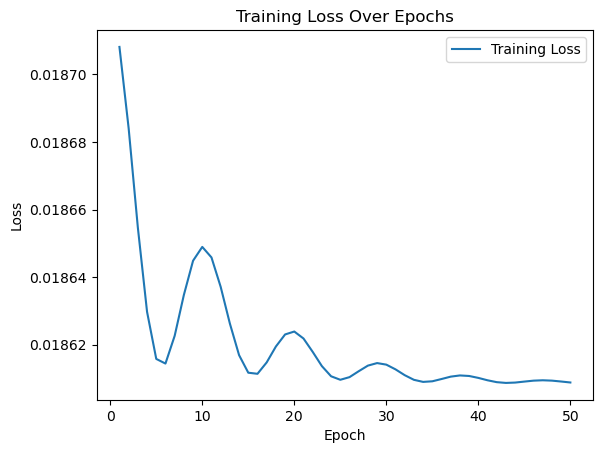

In [ ]:
train_losses = []  # To store loss values

for epoch in range(num_epochs):
    model.train()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())  # Store the loss

    if (epoch + 1) % 5 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Plot the training loss
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()

Epoch [5/50], Loss: 0.0285
Epoch [10/50], Loss: 0.0119
Epoch [15/50], Loss: 0.0075
Epoch [20/50], Loss: 0.0063
Epoch [25/50], Loss: 0.0083
Epoch [30/50], Loss: 0.0071
Epoch [35/50], Loss: 0.0053
Epoch [40/50], Loss: 0.0040
Epoch [45/50], Loss: 0.0034
Epoch [50/50], Loss: 0.0030
Train RMSE: 0.05
Validation RMSE: 0.10
Test RMSE: 0.15


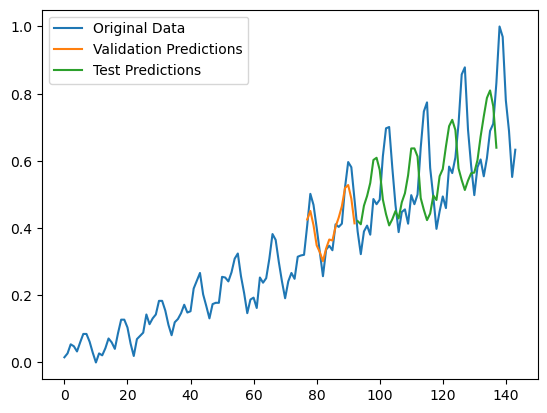

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# Split into training, validation, and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
val_size = int(train_size * 0.2)  # 20% of training set for validation
train, val, test = dataset[0:train_size - val_size, :], dataset[train_size - val_size:train_size, :], dataset[train_size:len(dataset), :]

# Convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back), 0])
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# Reshape into X=t and Y=t+1
look_back = 3
X_train, y_train = create_dataset(train, look_back)
X_val, y_val = create_dataset(val, look_back)
X_test, y_test = create_dataset(test, look_back)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32).unsqueeze(2)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32).unsqueeze(2)
y_val = torch.tensor(y_val, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32).unsqueeze(2)
y_test = torch.tensor(y_test, dtype=torch.float32)

# Define the RNN model
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(1, x.size(0), self.hidden_size)
        out, _ = self.rnn(x, h0)
        out = self.fc(out[:, -1, :])
        return out

# Hyperparameters
input_size = 1
hidden_size = 128
output_size = 1
learning_rate = 0.01
num_epochs = 50

# Initialize the model, loss function, and optimizer
model = RNN(input_size, hidden_size, output_size)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
train_losses = []
for epoch in range(num_epochs):
    model.train()
    outputs = model(X_train).squeeze()  # Reshape model output to match target shape
    loss = criterion(outputs, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())

    if (epoch + 1) % 5 == 0:  # Print loss every 5 epochs
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluation
model.eval()
with torch.no_grad():
    train_predict = model(X_train).squeeze()  # Reshape model output
    val_predict = model(X_val).squeeze()  # Reshape model output
    test_predict = model(X_test).squeeze()  # Reshape model output

# Inverse transform predictions
train_predict_inv = scaler.inverse_transform(train_predict.numpy().reshape(-1, 1))
y_train_inv = scaler.inverse_transform(y_train.numpy().reshape(-1, 1))
val_predict_inv = scaler.inverse_transform(val_predict.numpy().reshape(-1, 1))
y_val_inv = scaler.inverse_transform(y_val.numpy().reshape(-1, 1))
test_predict_inv = scaler.inverse_transform(test_predict.numpy().reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.numpy().reshape(-1, 1))

# Flatten test_predict
test_predict_inv = test_predict_inv.flatten()


# Generate x values for test predictions
test_x = np.arange(
    look_back + len(train_predict_inv) + len(val_predict_inv),
    look_back + len(train_predict_inv) + len(val_predict_inv) + len(test_predict_inv)
)

# Calculate RMSE for training, validation, and test sets
train_rmse = np.sqrt(mean_squared_error(y_train_inv, train_predict_inv))
val_rmse = np.sqrt(mean_squared_error(y_val_inv, val_predict_inv))
test_rmse = np.sqrt(mean_squared_error(y_test_inv, test_predict_inv))

print(f'Train RMSE: {train_rmse:.2f}')
print(f'Validation RMSE: {val_rmse:.2f}')
print(f'Test RMSE: {test_rmse:.2f}')

# Plot the results with updated variable names
plt.plot(scaler.inverse_transform(dataset), label='Original Data')
plt.plot(
    np.arange(look_back + len(train_predict_inv),
              look_back + len(train_predict_inv) + len(val_predict_inv)),
    val_predict_inv, label='Validation Predictions'
)
plt.plot(test_x, test_predict_inv, label='Test Predictions')
plt.legend()
plt.show()

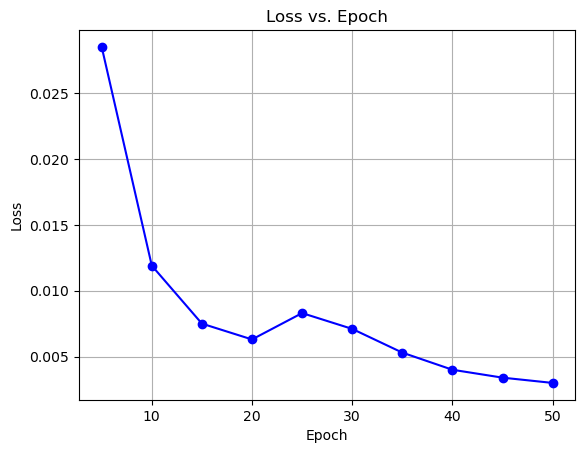

In [ ]:
import matplotlib.pyplot as plt

# Loss values
epochs = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
losses = [0.0285, 0.0119, 0.0075, 0.0063, 0.0083, 0.0071, 0.0053, 0.0040, 0.0034, 0.0030]

# Plot loss vs. epoch
plt.plot(epochs, losses, marker='o', linestyle='-', color='b')
plt.title('Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# Part 2 LSTM and GRU

In [ ]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTM, self).__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(1, x.size(0), self.hidden_size)  # Initial hidden state
        c0 = torch.zeros(1, x.size(0), self.hidden_size)  # Initial cell state
        out, _ = self.lstm(x, (h0, c0))  # LSTM forward pass
        out = self.fc(out[:, -1, :])  # Use the last time step's output
        return out

In [ ]:
#LSTM Implementation
# Initialize the LSTM model
model = LSTM(input_size, hidden_size, output_size)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Training loop (same as before)
for epoch in range(num_epochs):
    model.train()
    outputs = model(X_train).squeeze()
    loss = criterion(outputs, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 5 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluation (same as before)
model.eval()
with torch.no_grad():
    train_predict = model(X_train).squeeze()
    val_predict = model(X_val).squeeze()
    test_predict = model(X_test).squeeze()

# Calculate RMSE for LSTM
train_rmse_lstm = np.sqrt(mean_squared_error(y_train, train_predict))
val_rmse_lstm = np.sqrt(mean_squared_error(y_val, val_predict))
test_rmse_lstm = np.sqrt(mean_squared_error(y_test, test_predict))
print(f'LSTM - Train RMSE: {train_rmse_lstm:.2f}')
print(f'LSTM - Validation RMSE: {val_rmse_lstm:.2f}')
print(f'LSTM - Test RMSE: {test_rmse_lstm:.2f}')

Epoch [5/50], Loss: 0.0083
Epoch [10/50], Loss: 0.0076
Epoch [15/50], Loss: 0.0070
Epoch [20/50], Loss: 0.0069
Epoch [25/50], Loss: 0.0057
Epoch [30/50], Loss: 0.0045
Epoch [35/50], Loss: 0.0034
Epoch [40/50], Loss: 0.0026
Epoch [45/50], Loss: 0.0023
Epoch [50/50], Loss: 0.0024
LSTM - Train RMSE: 0.05
LSTM - Validation RMSE: 0.10
LSTM - Test RMSE: 0.15


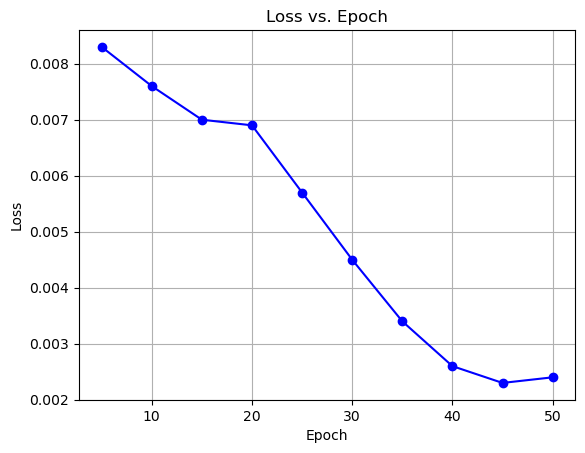

In [ ]:
import matplotlib.pyplot as plt

# Loss values
epochs = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
losses = [0.0083, 0.0076, 0.0070, 0.0069, 0.0057, 0.0045, 0.0034, 0.0026, 0.0023, 0.0024]

# Plot loss vs. epoch
plt.plot(epochs, losses, marker='o', linestyle='-', color='b')
plt.title('Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

In [ ]:
class GRU(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(GRU, self).__init__()
        self.hidden_size = hidden_size
        self.gru = nn.GRU(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(1, x.size(0), self.hidden_size)  # Initial hidden state
        out, _ = self.gru(x, h0)  # GRU forward pass
        out = self.fc(out[:, -1, :])  # Use the last time step's output
        return out

In [ ]:
# Initialize the GRU model
model = GRU(input_size, hidden_size, output_size)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Training loop (same as before)
for epoch in range(num_epochs):
    model.train()
    outputs = model(X_train).squeeze()
    loss = criterion(outputs, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 5 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluation (same as before)
model.eval()
with torch.no_grad():
    train_predict = model(X_train).squeeze()
    val_predict = model(X_val).squeeze()
    test_predict = model(X_test).squeeze()

# Calculate RMSE for GRU
train_rmse_gru = np.sqrt(mean_squared_error(y_train, train_predict))
val_rmse_gru = np.sqrt(mean_squared_error(y_val, val_predict))
test_rmse_gru = np.sqrt(mean_squared_error(y_test, test_predict))
print(f'GRU - Train RMSE: {train_rmse_gru:.2f}')
print(f'GRU - Validation RMSE: {val_rmse_gru:.2f}')
print(f'GRU - Test RMSE: {test_rmse_gru:.2f}')

Epoch [5/50], Loss: 0.0077
Epoch [10/50], Loss: 0.0078
Epoch [15/50], Loss: 0.0081
Epoch [20/50], Loss: 0.0063
Epoch [25/50], Loss: 0.0044
Epoch [30/50], Loss: 0.0035
Epoch [35/50], Loss: 0.0026
Epoch [40/50], Loss: 0.0021
Epoch [45/50], Loss: 0.0023
Epoch [50/50], Loss: 0.0021
GRU - Train RMSE: 0.05
GRU - Validation RMSE: 0.09
GRU - Test RMSE: 0.12


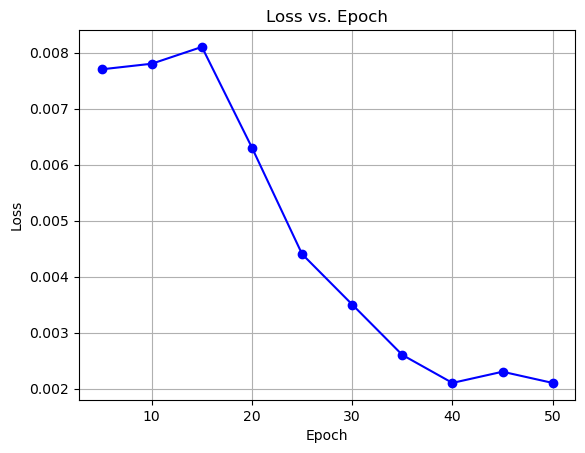

In [ ]:
import matplotlib.pyplot as plt

# Loss values
epochs = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
losses = [0.0077, 0.0078, 0.0081, 0.0063, 0.0044, 0.0035, 0.0026, 0.0021, 0.0023, 0.0021]

# Plot loss vs. epoch
plt.plot(epochs, losses, marker='o', linestyle='-', color='b')
plt.title('Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

## Part 3
A traditional feed-forward neural network (FFN) can be used to solve the time-series prediction problem, but it is not the most natural or effective choice for this type of task. Reasons could be
1. Time-Series Data and Sequential Dependencies
Time-series data, such as the Air Passengers dataset, has a temporal structure where the value at a given time step depends on previous time steps. This sequential dependency is a key characteristic of time-series data.
Feed-Forward Networks (FFNs): FFNs are not designed to handle sequential dependencies. They treat each input as independent and do not have any mechanism to "remember" past inputs. This makes it difficult for FFNs to capture patterns like trends, seasonality, or autocorrelation in time-series data.

Recurrent Neural Networks (RNNs): RNNs, on the other hand, are specifically designed for sequential data. They have a memory mechanism that allows them to retain information from previous time steps, making them more suitable for time-series prediction.

2. Converting Time-Series Data for FFNs
To use a feed-forward network for time-series prediction, you need to transform the sequential data into a format that FFNs can process. This typically involves creating a set of features that represent the temporal dependencies. Here's how you can do it:

Feature Engineering for FFNs:
Lag Features: Use past values (lags) as input features. For example, if you want to predict the number of passengers at time
t,  you can use the values at t-1,t-2,...,t-n as input features.

Rolling Statistics: Compute rolling statistics like mean, standard deviation, or moving averages over a sliding window of past values and use them as features.

Once the data is transformed into these features, it can be fed into a feed-forward network. However, this approach requires careful feature engineering and may not generalize well to complex time-series patterns.

To summarize, while a traditional feed-forward network can be used for time-series prediction by transforming the data into feature-based inputs, it is not the most natural or effective approach. Sequence models like RNNs, LSTMs, or GRUs are better suited for this task because they are designed to handle sequential dependencies and can automatically learn temporal patterns without extensive feature engineering. However, FFNs can still be used as a baseline model or for simpler time-series problems.

## Task 3
# Part 1

For this implementation, I will use GloVe (Global Vectors for Word Representation) embeddings. Here's why:

GloVe: GloVe is a widely used word embedding model that captures global statistics of word co-occurrence across a corpus. It is efficient, easy to use, and provides high-quality embeddings for a variety of NLP tasks.

Comparison with Other Models:

Word2Vec: Word2Vec is also popular, but it focuses on local context windows and may not capture global co-occurrence statistics as effectively as GloVe.

FastText: FastText extends Word2Vec by incorporating subword information, which is useful for handling rare or misspelled words. However, it is computationally more expensive.

BERT: BERT provides contextualized embeddings, which are more powerful but also more resource-intensive. For simple word-level tasks, GloVe is often sufficient and more efficient.

GloVe strikes a balance between performance and computational efficiency, making it a good choice for this task.

Handling Out-of-Vocabulary (OOV) Words
If a word is out of vocabulary, we can handle it in the following ways:

Suggestions for Approximating OOV Embeddings:

Subword Information: Use FastText embeddings, which can generate embeddings for OOV words by averaging the embeddings of their subwords.

Nearest Known Word: Find the nearest in-vocabulary word using character-level similarity (e.g., Levenshtein distance) and use its embedding.

Zero Vector or Random Vector: Assign a zero vector or a random vector as the embedding, though this is less ideal.

Contextualized Embeddings: Use a contextualized model like BERT to generate embeddings for OOV words dynamically.

I have used the nearest known word to handle OOV words.

In [ ]:
import gensim
import numpy
import scipy
import gensim.downloader as api

In [ ]:
# Load the FastText model from Gensim's pre-trained models
model = api.load('fasttext-wiki-news-subwords-300')  # 300-dimensional FastText vectors
print("Model loaded successfully!")

[==================================================] 100.0% 958.5/958.4MB downloaded
Model loaded successfully!


In [ ]:
info = api.info()  # Get information about available models/datasets
print(info)

{'corpora': {'semeval-2016-2017-task3-subtaskBC': {'num_records': -1, 'record_format': 'dict', 'file_size': 6344358, 'reader_code': 'https://github.com/RaRe-Technologies/gensim-data/releases/download/semeval-2016-2017-task3-subtaskB-eng/__init__.py', 'license': 'All files released for the task are free for general research use', 'fields': {'2016-train': ['...'], '2016-dev': ['...'], '2017-test': ['...'], '2016-test': ['...']}, 'description': 'SemEval 2016 / 2017 Task 3 Subtask B and C datasets contain train+development (317 original questions, 3,169 related questions, and 31,690 comments), and test datasets in English. The description of the tasks and the collected data is given in sections 3 and 4.1 of the task paper http://alt.qcri.org/semeval2016/task3/data/uploads/semeval2016-task3-report.pdf linked in section “Papers” of https://github.com/RaRe-Technologies/gensim-data/issues/18.', 'checksum': '701ea67acd82e75f95e1d8e62fb0ad29', 'file_name': 'semeval-2016-2017-task3-subtaskBC.gz',

In [ ]:
# Function to get embeddings for two words
def get_word_embeddings(word1, word2, model):
    embeddings = {}

    # Handle Out-of-Vocabulary (OOV) words with FastText's subword approach
    for word in [word1, word2]:
        if word in model:
            embeddings[word] = model[word]
        else:
            print(f"'{word}' is out of vocabulary (OOV). Using subword approximation.")
            embeddings[word] = model.get_mean_vector(word.split())

    return embeddings

# Dynamic input
word1 = input("Enter the first word: ").strip().lower()
word2 = input("Enter the second word: ").strip().lower()

# Retrieve embeddings
embeddings = get_word_embeddings(word1, word2, model)

# Display the embeddings
for word, vector in embeddings.items():
    print(f"Embedding for '{word}':\n{vector[:20]}...")  # Show only the first 10 elements


'racemix' is out of vocabulary (OOV). Using subword approximation.
Embedding for 'life':
[ 0.0031941 -0.1289     0.11445   -0.009161  -0.0059675  0.0042326
 -0.0335    -0.12365    0.17044    0.039937   0.053347  -0.094224
  0.022911  -0.048023  -0.035388  -0.067587   0.17104    0.047225
  0.064031   0.082609 ]...
Embedding for 'racemix':
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]...


In [ ]:
import numpy as np
import gensim.downloader as api
from Levenshtein import distance as levenshtein_distance

# Load GloVe embeddings using Gensim API
def load_glove_embeddings():
    print("Loading GloVe embeddings...")
    word_vectors = api.load('glove-wiki-gigaword-300')  # 300-dimensional GloVe vectors
    print("Embeddings loaded successfully!")
    return word_vectors

# Approximate embedding for OOV words
def approximate_embedding(word, word_vectors):
    # Find the closest in-vocabulary word using Levenshtein distance
    closest_word = min(word_vectors.index_to_key, key=lambda x: levenshtein_distance(word, x))
    print(f"'{word}' is out of vocabulary (OOV). Using embedding of the closest word: '{closest_word}'.")
    return word_vectors[closest_word]

# Get embeddings for two words
def get_word_embeddings(word1, word2, word_vectors):
    try:
        embedding1 = word_vectors[word1]
    except KeyError:
        embedding1 = approximate_embedding(word1, word_vectors)
    try:
        embedding2 = word_vectors[word2]
    except KeyError:
        embedding2 = approximate_embedding(word2, word_vectors)
    print(f"Embedding for '{word1}': {embedding1}")
    print(f"Embedding for '{word2}': {embedding2}")

# Main program
if __name__ == "__main__":
    # Load embeddings using Gensim API
    word_vectors = load_glove_embeddings()

    # Get user input
    word1 = input("Enter the first word: ").strip().lower()
    word2 = input("Enter the second word: ").strip().lower()

    # Get and display embeddings
    get_word_embeddings(word1, word2, word_vectors)

Loading GloVe embeddings...
[==================================================] 100.0% 376.1/376.1MB downloaded
Embeddings loaded successfully!
'racemix' is out of vocabulary (OOV). Using embedding of the closest word: 'racemic'.
Embedding for 'racemix': [ 6.6762e-01  7.9302e-01  4.0362e-01  1.7990e-01 -3.6301e-01 -2.6572e-01
  4.2567e-01 -3.6863e-01  9.9625e-02  4.9451e-01 -3.3486e-01 -3.8109e-01
  1.2136e-01 -5.9690e-01 -1.0284e-01 -3.9407e-01 -3.9288e-01  8.1703e-01
  5.4415e-01 -7.4519e-01 -1.0255e+00 -5.7632e-01 -6.8777e-01  6.3336e-01
 -4.5257e-01  3.5682e-01 -6.1820e-01 -4.4123e-01  9.6865e-02 -4.9268e-01
  9.2701e-02 -6.2511e-01  1.1914e-01 -3.4779e-01  4.7255e-01  6.1043e-01
 -1.7643e-01  1.1841e-01 -3.7935e-01  7.9364e-01 -5.6168e-01 -1.0982e-01
 -4.1363e-02  1.7545e-01  1.8031e-01 -2.9678e-01 -5.2895e-02  1.3565e-01
  5.5290e-01  9.0749e-01 -4.9755e-02  9.1462e-02 -1.9312e-01  5.0323e-01
 -4.2277e-01 -6.4105e-02  5.7548e-01 -7.3112e-01 -3.2670e-01 -2.8279e-01
 -1.8907e-01  

Loading GloVe embeddings...
Embeddings loaded successfully!
'jupyter' is OOV. Using nearest known word: 'jupiter'.
Cosine similarity between 'king' and 'queen': 0.6336
Cosine similarity between 'man' and 'woman': 0.6999
Cosine similarity between 'paris' and 'france': 0.6581
Cosine similarity between 'jupyter' and 'notebook': 0.0760
'jupyter' is OOV. Using nearest known word: 'jupiter'.


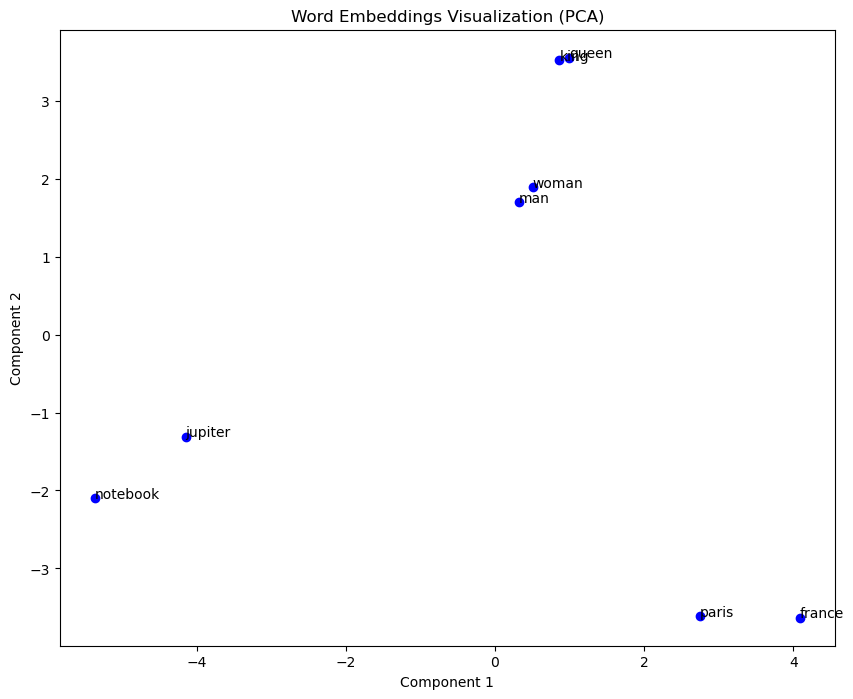

In [ ]:
import numpy as np
import gensim.downloader as api
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from Levenshtein import distance as levenshtein_distance

# Cosine similarity function
def cosine_similarity(vec1, vec2):
    """Compute cosine similarity between two vectors."""
    dot_product = np.dot(vec1, vec2)
    norm1 = np.linalg.norm(vec1)
    norm2 = np.linalg.norm(vec2)
    return dot_product / (norm1 * norm2)
# Find nearest known word for OOV words
def find_nearest_word(oov_word, word_vectors):
    """Find the nearest known word for an OOV word using Levenshtein distance."""
    nearest_word = min(word_vectors.index_to_key, key=lambda x: levenshtein_distance(oov_word, x))
    return nearest_word

# Batch cosine similarity function with OOV handling
def batch_cosine_similarity(word_pairs, word_vectors):
    """Compute cosine similarity for multiple word pairs, handling OOV words."""
    similarities = []
    for word1, word2 in word_pairs:
        # Handle OOV for word1
        if word1 not in word_vectors:
            nearest_word1 = find_nearest_word(word1, word_vectors)
            print(f"'{word1}' is OOV. Using nearest known word: '{nearest_word1}'.")
            vec1 = word_vectors[nearest_word1]
        else:
            vec1 = word_vectors[word1]

        # Handle OOV for word2
        if word2 not in word_vectors:
            nearest_word2 = find_nearest_word(word2, word_vectors)
            print(f"'{word2}' is OOV. Using nearest known word: '{nearest_word2}'.")
            vec2 = word_vectors[nearest_word2]
        else:
            vec2 = word_vectors[word2]

        # Compute cosine similarity
        sim = cosine_similarity(vec1, vec2)
        similarities.append((word1, word2, sim))
    return similarities

# Visualization function with OOV handling
def visualize_embeddings(words, word_vectors, method='pca'):
    """Visualize word embeddings in 2D using PCA or t-SNE, handling OOV words."""
    valid_words = []
    embeddings = []

    for word in words:
        if word in word_vectors:
            valid_words.append(word)
            embeddings.append(word_vectors[word])
        else:
            nearest_word = find_nearest_word(word, word_vectors)
            print(f"'{word}' is OOV. Using nearest known word: '{nearest_word}'.")
            valid_words.append(nearest_word)
            embeddings.append(word_vectors[nearest_word])

    embeddings = np.array(embeddings)

    # Reduce dimensionality
    if method == 'pca':
        reducer = PCA(n_components=2)
    elif method == 'tsne':
        reducer = TSNE(n_components=2, random_state=42)
    else:
        raise ValueError("Method must be 'pca' or 'tsne'.")

    reduced_embeddings = reducer.fit_transform(embeddings)

    # Plot
    plt.figure(figsize=(10, 8))
    plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], color='blue')
    for i, word in enumerate(valid_words):
        plt.annotate(word, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]))
    plt.title(f"Word Embeddings Visualization ({method.upper()})")
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.show()

# Main program
if __name__ == "__main__":
    # Load embeddings
    word_vectors = load_glove_embeddings()

    # Batch cosine similarity
    word_pairs = [("king", "queen"), ("man", "woman"), ("paris", "france"), ("jupyter", "notebook")]
    similarities = batch_cosine_similarity(word_pairs, word_vectors)
    for word1, word2, sim in similarities:
        print(f"Cosine similarity between '{word1}' and '{word2}': {sim:.4f}")

    # Visualization
    words = ["king", "queen", "man", "woman", "paris", "france", "jupyter", "notebook"]
    visualize_embeddings(words, word_vectors, method='pca')  # Use 'tsne' for t-SNE

In [ ]:
!pip install seaborn

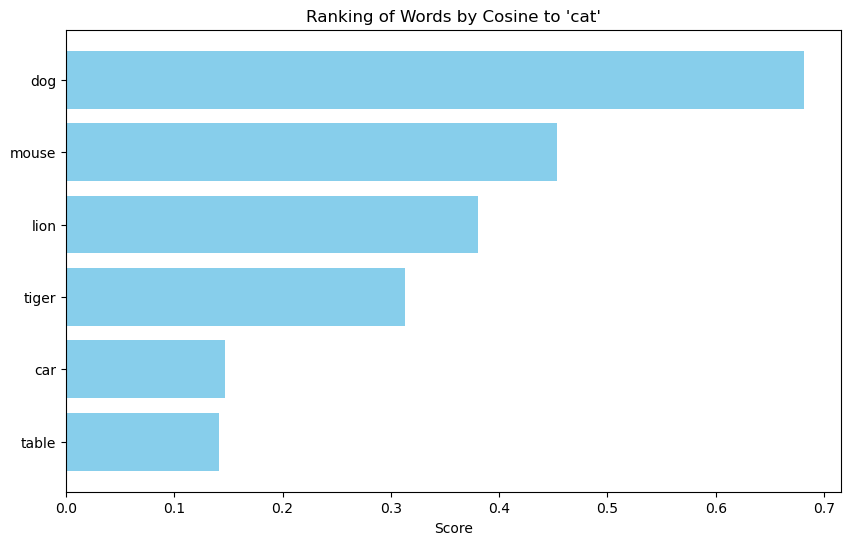

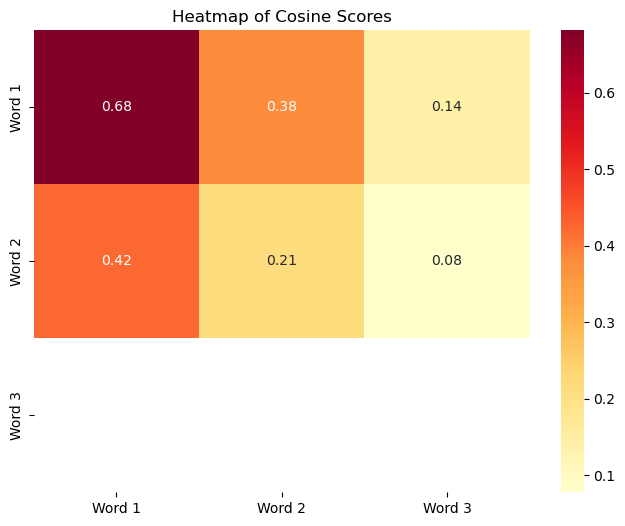

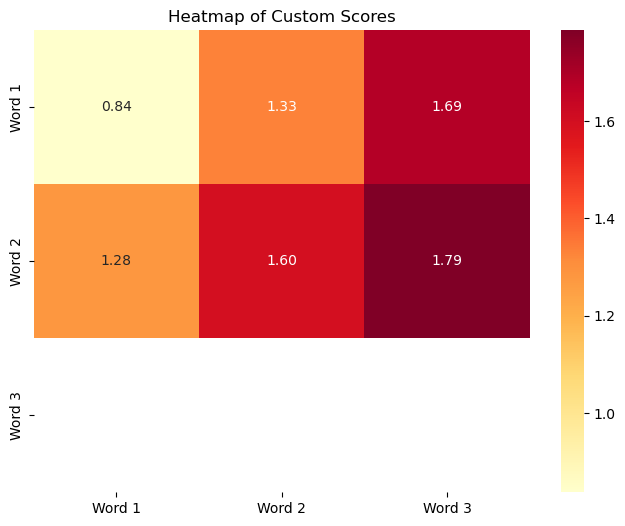

In [ ]:
import numpy as np
import gensim.downloader as api
import matplotlib.pyplot as plt
import seaborn as sns

# Cosine similarity function
def cosine_similarity(vec1, vec2):
    """Compute cosine similarity between two vectors."""
    dot_product = np.dot(vec1, vec2)
    norm1 = np.linalg.norm(vec1)
    norm2 = np.linalg.norm(vec2)
    return dot_product / (norm1 * norm2)

# Euclidean distance function
def euclidean_distance(vec1, vec2):
    """Compute Euclidean distance between two vectors."""
    return np.linalg.norm(vec1 - vec2)

# Custom dissimilarity function
def custom_dissimilarity(vec1, vec2, alpha=0.1):
    """Compute custom dissimilarity score."""
    cos_sim = cosine_similarity(vec1, vec2)
    euc_dist = euclidean_distance(vec1, vec2)
    return 1 - cos_sim + alpha * euc_dist

# Metric computation function
def compute_metric(vec1, vec2, metric='cosine'):
    """Compute similarity/dissimilarity based on the selected metric."""
    if metric == 'cosine':
        return cosine_similarity(vec1, vec2)
    elif metric == 'euclidean':
        return euclidean_distance(vec1, vec2)
    elif metric == 'custom':
        return custom_dissimilarity(vec1, vec2)
    else:
        raise ValueError("Invalid metric. Choose 'cosine', 'euclidean', or 'custom'.")

# Ranking function
def rank_words(target_word, words, word_vectors, metric='cosine'):
    """Rank words based on their similarity/dissimilarity to the target word."""
    target_vec = word_vectors[target_word]
    rankings = []

    for word in words:
        if word in word_vectors:
            vec = word_vectors[word]
            score = compute_metric(target_vec, vec, metric)
            rankings.append((word, score))

    # Sort by score (ascending for dissimilarity, descending for similarity)
    if metric == 'euclidean' or metric == 'custom':
        rankings.sort(key=lambda x: x[1])  # Ascending for dissimilarity
    else:
        rankings.sort(key=lambda x: -x[1])  # Descending for similarity

    return rankings

# Plot rankings
def plot_rankings(target_word, words, word_vectors, metric='cosine'):
    """Plot the ranking of words based on their similarity/dissimilarity to the target word."""
    rankings = rank_words(target_word, words, word_vectors, metric)
    words_ranked = [word for word, _ in rankings]
    scores = [score for _, score in rankings]

    plt.figure(figsize=(10, 6))
    plt.barh(words_ranked, scores, color='skyblue')
    plt.xlabel('Score')
    plt.title(f"Ranking of Words by {metric.capitalize()} to '{target_word}'")
    plt.gca().invert_yaxis()  # Highest score at the top
    plt.show()

# Heatmap function
def create_heatmap(word_pairs, word_vectors, metric='cosine'):
    """Create a heatmap to compare similarity/dissimilarity scores for multiple word pairs."""
    scores = []
    for word1, word2 in word_pairs:
        if word1 in word_vectors and word2 in word_vectors:
            vec1 = word_vectors[word1]
            vec2 = word_vectors[word2]
            score = compute_metric(vec1, vec2, metric)
            scores.append(score)
        else:
            scores.append(np.nan)  # Handle OOV words

    # Reshape scores into a square matrix
    #n = int(np.sqrt(len(word_pairs)))
    #n = int(np.ceil(np.sqrt(len(word_pairs))))
    #scores_matrix = np.array(scores).reshape(n, n)
    # Pad with NaN values to make `scores` length a perfect square
    num_elements = len(scores)
    n = int(np.ceil(np.sqrt(num_elements)))

    # Calculate required padding
    padding_size = n * n - num_elements
    scores_padded = np.pad(scores, (0, padding_size), mode='constant', constant_values=np.nan)

    # Reshape the padded scores into a square matrix
    scores_matrix = np.array(scores_padded).reshape(n, n)

    # Plot heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(scores_matrix, annot=True, fmt=".2f", cmap="YlOrRd",
                xticklabels=[f"Word {i+1}" for i in range(n)],
                yticklabels=[f"Word {i+1}" for i in range(n)])
    plt.title(f"Heatmap of {metric.capitalize()} Scores")
    plt.show()

# Main program
if __name__ == "__main__":
    # Load embeddings
    #word_vectors = load_glove_embeddings()

    # Example: Ranking of words
    target_word = "cat"
    words = ["dog", "lion", "table", "tiger", "car", "mouse"]
    plot_rankings(target_word, words, word_vectors, metric='cosine') #Based on similarity

    # Example: Heatmap for word pairs
    word_pairs = [("cat", "dog"), ("cat", "lion"), ("cat", "table"),
                  ("dog", "lion"), ("dog", "table"), ("lion", "table")]
    create_heatmap(word_pairs, word_vectors, metric='cosine') #Similarity
    create_heatmap(word_pairs, word_vectors, metric='custom') #Dissimilarity